# 1. モデルのインポート

In [1]:
from hawkes import Model

# 2. シミュレーション

### 2.1. 指数カーネル: 1次元

In [2]:
# 指数関数カーネルモデルのシミュレーターを生成
exp_simulator = Model.build_simulator('exp')

# パラメータを指定
baselines = 0.1
adjacencies = 0.2
decays = 0.3
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)

# シミュレーション時間を指定して、シミュレーションを実行
end_time = 1000
exp_simulation = exp_simulator(end_time=end_time)

In [3]:
# シミュレーションの結果の情報一覧を表示
exp_simulation.info()

- kernel_type: exp
- params: {'baselines': array([0.1]), 'adjacencies': array([[0.2]]), 'decays': array([[0.3]])}
- end_time: 1000
- events:
  - dim_1: [ 15.83  19.07  21.98  26.69  27.54  28.94  28.98  37.28  38.49  48.14
  71.53  74.71  85.62 122.17 124.77 124.93 131.34 147.69 150.16 167.88
 171.   172.44 176.48 176.86 202.24 205.66 207.37 209.03 212.08 214.94
 228.39 230.87 231.46 231.51 234.21 234.75 236.43 240.82 251.36 251.42
 264.48 271.67 306.77 320.05 321.08 322.08 326.58 340.72 357.82 366.3
 367.5  367.63 375.9  376.22 393.63 408.02 411.11 451.1  453.48 453.51
 454.96 473.98 475.1  475.7  479.56 486.73 498.19 535.56 544.44 559.06
 567.34 570.08 570.72 572.24 584.92 599.46 611.79 639.59 643.44 647.36
 654.75 656.13 663.44 664.46 680.86 688.61 693.88 701.8  703.06 708.85
 718.   719.47 724.24 744.76 748.61 762.66 770.84 786.77 791.98 792.26
 797.83 802.71 805.33 809.08 824.41 840.   849.28 851.75 856.41 863.42
 868.73 884.21 905.66 916.4  921.46 934.79 935.58 945.94 972.68 973.

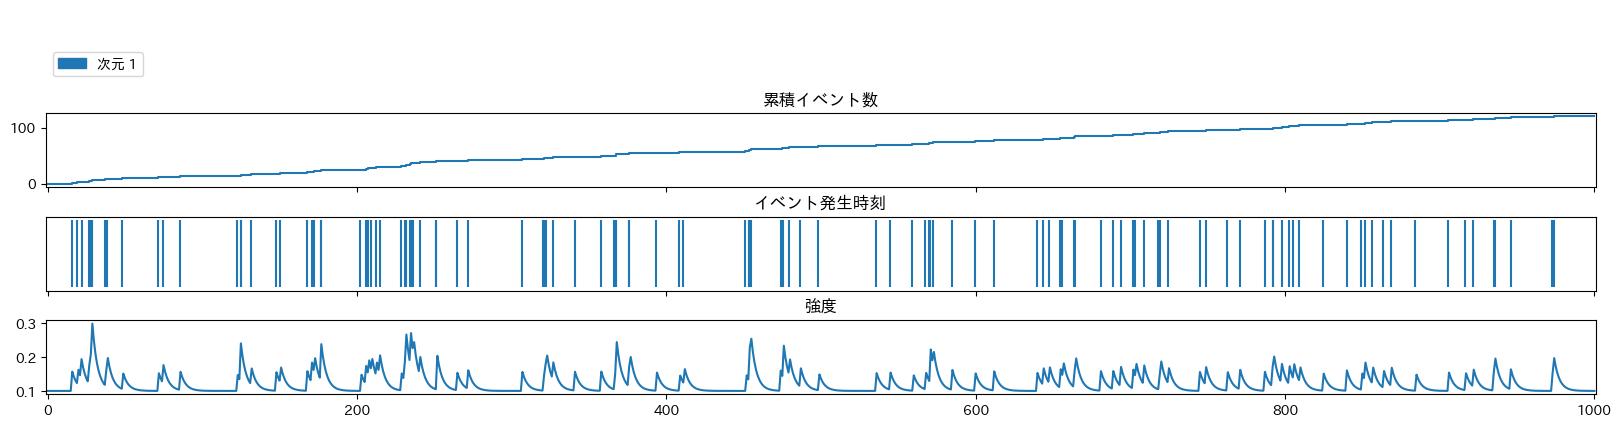

In [4]:
# シミュレーションの結果をプロット
exp_simulation.plot()

In [5]:
# シミュレーション結果の値の取得
print('✅ イベントの発生時刻:\n', exp_simulation.events)
print('✅ シミュレーション終了時刻:\n', exp_simulation.end_time)
print('✅ 条件付き強度関数:\n', exp_simulation.intensity)

✅ イベントの発生時刻:
 [ 15.82777316  19.06543831  21.97782123  26.69002047  27.54399809
  28.94048926  28.97964252  37.27824912  38.4865771   48.14278874
  71.5270021   74.70773857  85.62377519 122.1670526  124.76649764
 124.93148978 131.33512636 147.69047006 150.16074374 167.87693742
 170.99572135 172.44084752 176.48155805 176.86319953 202.24219522
 205.66470678 207.36894796 209.02751323 212.08031271 214.94135633
 228.39399311 230.87226106 231.45736188 231.50841899 234.21120839
 234.75313767 236.42815912 240.81766434 251.36183353 251.42187094
 264.47996942 271.67094586 306.76992448 320.04505115 321.08359495
 322.08079702 326.57807553 340.72199881 357.81839473 366.30410485
 367.49520963 367.63368111 375.89885558 376.21773911 393.62536547
 408.02307063 411.11008955 451.10029608 453.47788146 453.50515383
 454.95957899 473.97789915 475.09561014 475.69705247 479.56173936
 486.72997071 498.1861809  535.55566975 544.43857382 559.06193606
 567.33707766 570.08062462 570.72446659 572.24410901 584.92465

### 2.2. 指数関数カーネル: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

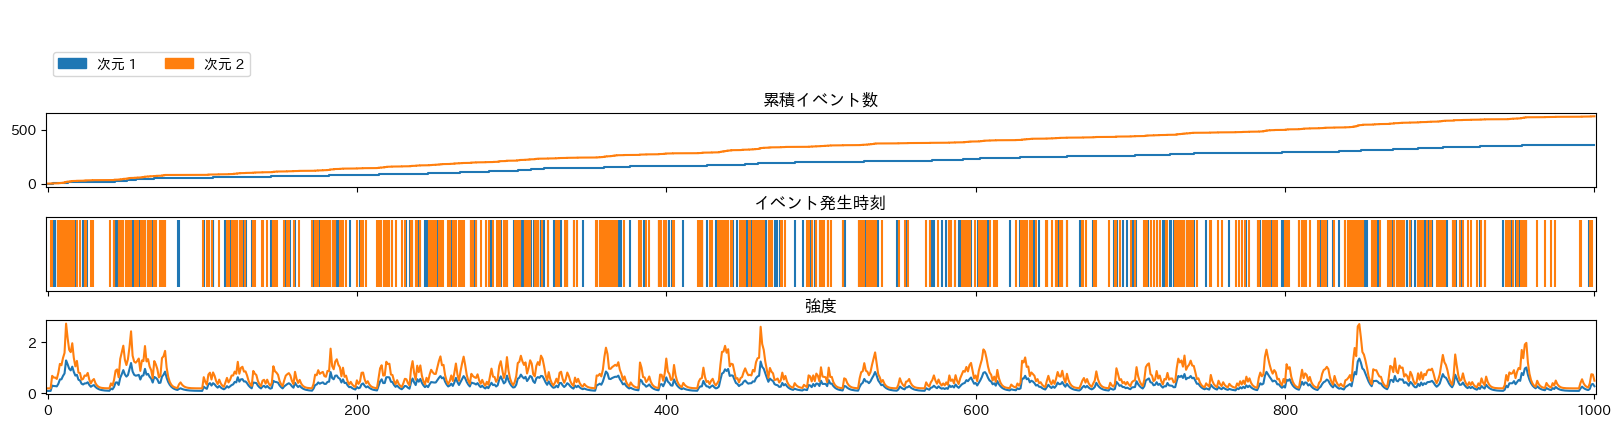

In [6]:
multi_exp_simulator = Model.build_simulator('exp')


# パラメータを指定 (baselines: n次元ベクトル, adjacencies: n×n行列, decays: n×n行列)
baselines = [0.1, 0.2]
adjacencies = [[0.2, 0.3],
               [0.4, 0.5]]
decays = [[0.3, 0.4],
          [0.5, 0.6]]
multi_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)

end_time = 1000
multi_exp_simulation = multi_exp_simulator(end_time=end_time)

multi_exp_simulation.plot()

### 2.3 べき分布カーネル: 1次元・多次元

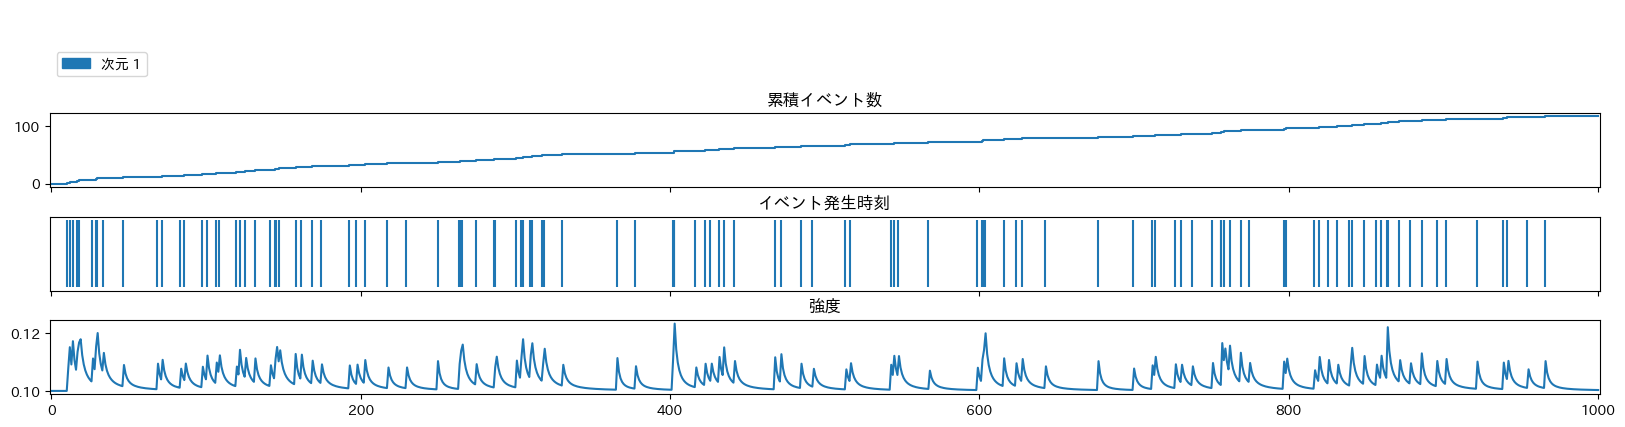

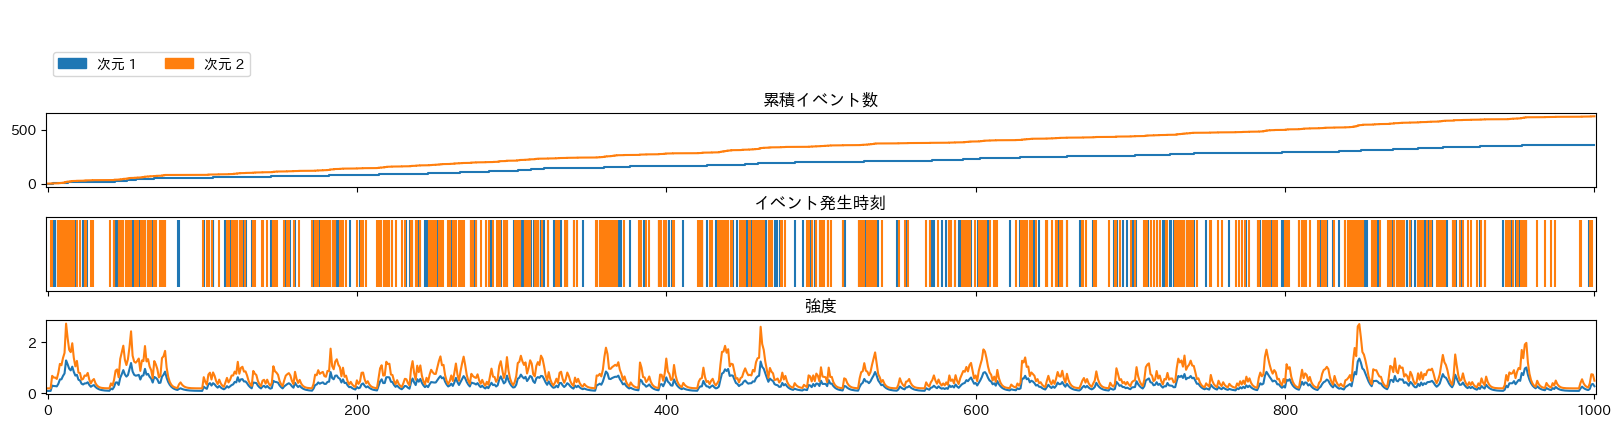

In [7]:
# べき分布カーネルモデルのシミュレーターを生成
pow_law_simulator = Model.build_simulator('pow_law')

# シミュレーション時間を指定
end_time = 1000

# パラメータを指定: 1次元
baselines = 0.1
multipliers = 0.1
exponents = 2
cutoffs = 3
pow_law_simulator.set_params(baselines=baselines, multipliers=multipliers, exponents=exponents, cutoffs=cutoffs)

pow_law_simulation = pow_law_simulator(end_time=end_time)
pow_law_simulation.plot()

# パラメータの指定: 多次元 (baselines: n次元ベクトル, multipliers: n×n行列, exponents: n×n行列, cutoffs: n×n行列)
baselines = [0.1, 0.1]
multipliers = [[0.1, 0.2],
               [0.2, 0.1]]
exponents = [[2, 3],
             [3, 2]]
cutoffs = [[3, 4],
           [4, 3]]
pow_law_simulator.set_params(baselines=baselines, multipliers=multipliers, exponents=exponents, cutoffs=cutoffs)

multi_pow_law_simulation = pow_law_simulator(end_time=end_time)
multi_exp_simulation.plot()

### 2.4 指数和カーネル: 1次元・多次元

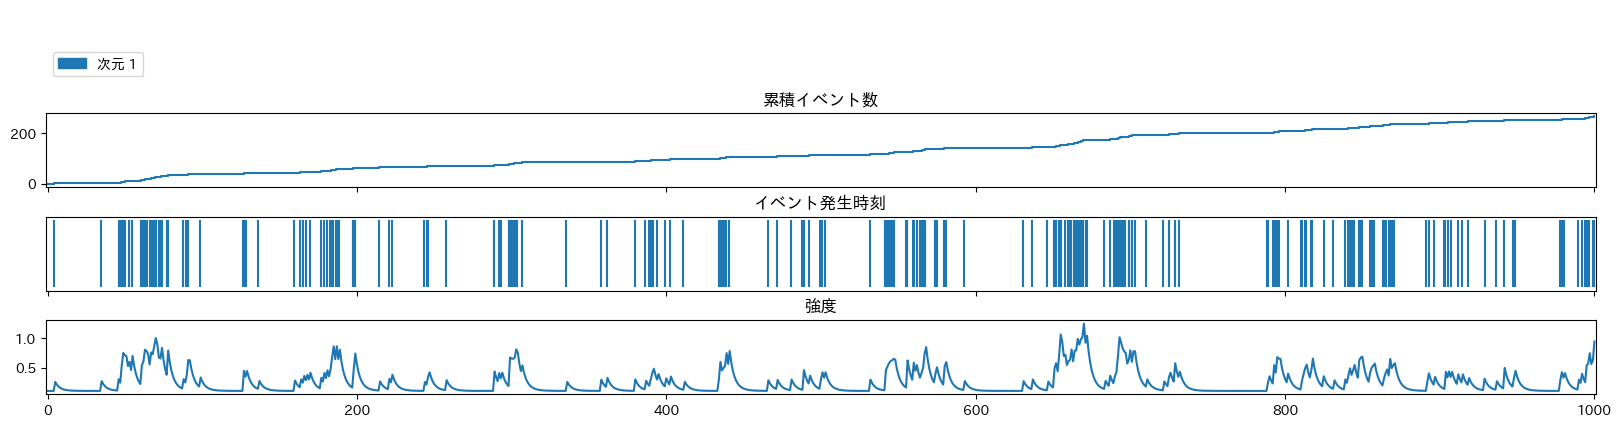

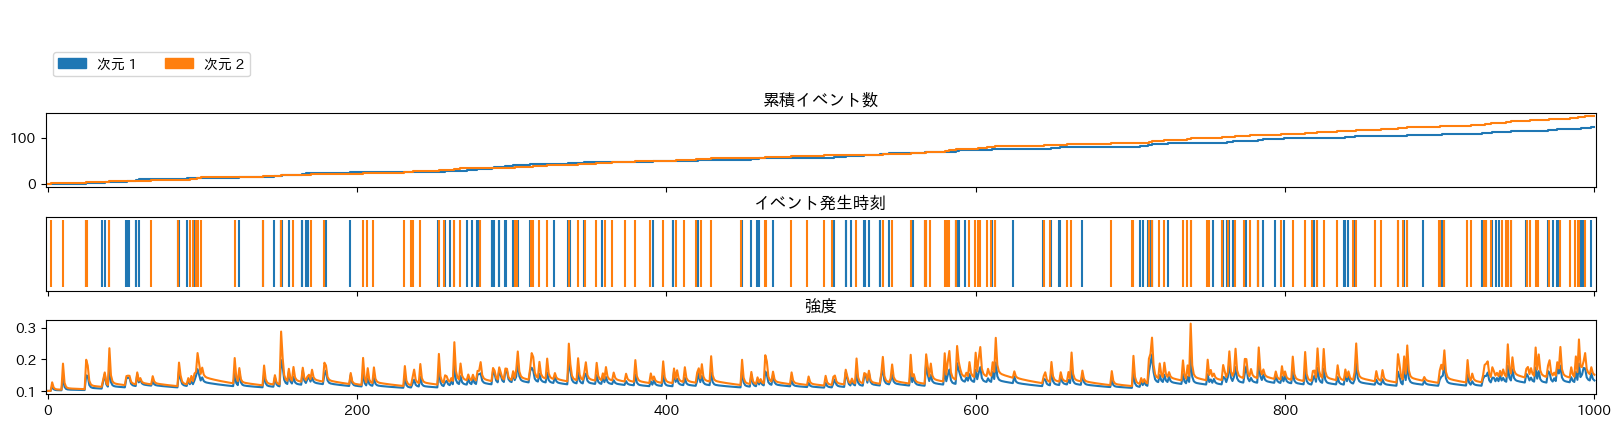

In [8]:
# 指数和カーネルモデルのシミュレーターを生成
sum_exp_simulator = Model.build_simulator('sum_exp')

# シミュレーション時間を指定
end_time = 1000

# イベントの次元をD, 指数関数の数をUとする. Uは2以上を想定.
# パラメータを指定: 1次元(本例ではD=1, U=3)
baselines = 0.1 # スカラー
adjacencies = [0.1, 0.2, 0.3] # U次元ベクトル
decays = [0.2, 0.3, 0.4] # U次元ベクトル

sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
sum_exp_simulation = sum_exp_simulator(end_time=end_time)
sum_exp_simulation.plot()

# パラメータの指定: 多次元(本例ではD=2, U=3)
baselines = [0.1, 0.1] # D次元ベクトル
adjacencies = [[[0.01, 0.01, 0.01], [0.02, 0.02, 0.02]],
               [[0.03, 0.03, 0.03], [0.04, 0.04, 0.04]]] # D×D×U行列
decays = [1, 1.5, 2], # U次元ベクトル

sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
multi_sum_exp_simulation = sum_exp_simulator(end_time=end_time)
multi_sum_exp_simulation.plot()

# 3. 推定

### 3.1.　指数カーネル: 1次元

- kernel_type: exp
- params: {'baselines': array([0.10653707]), 'adjacencies': array([[0.16770929]]), 'decays': array([[0.41981854]])}
- end_time: 1000
- loglik: -388.3335810303583
- events:
  - dim_1: [ 17.61  19.7   21.58  22.1   25.67  31.43  55.6   70.03  73.93  81.55
  82.33  82.38  84.47  88.72 134.44 145.97 150.27 157.01 160.89 161.25
 161.53 181.55 191.08 208.93 209.85 211.14 212.82 217.21 218.14 221.99
 223.16 230.19 235.81 241.32 249.69 257.15 270.23 304.97 316.28 316.63
 319.09 322.56 330.93 337.19 337.94 343.38 347.41 363.99 372.96 375.47
 392.21 394.78 395.56 402.05 403.54 406.07 408.76 437.88 439.85 442.88
 452.78 462.58 489.   489.84 503.86 503.94 506.28 537.67 539.01 554.69
 556.94 557.09 559.56 571.36 597.42 610.79 631.32 644.73 645.52 647.67
 648.69 650.59 663.45 683.67 691.43 691.44 696.22 698.66 698.87 700.53
 703.1  710.38 710.8  727.64 728.54 730.93 731.28 742.38 746.83 755.5
 760.57 764.4  779.97 780.33 794.8  795.33 801.67 814.3  820.89 824.48
 829.86 840.4  845

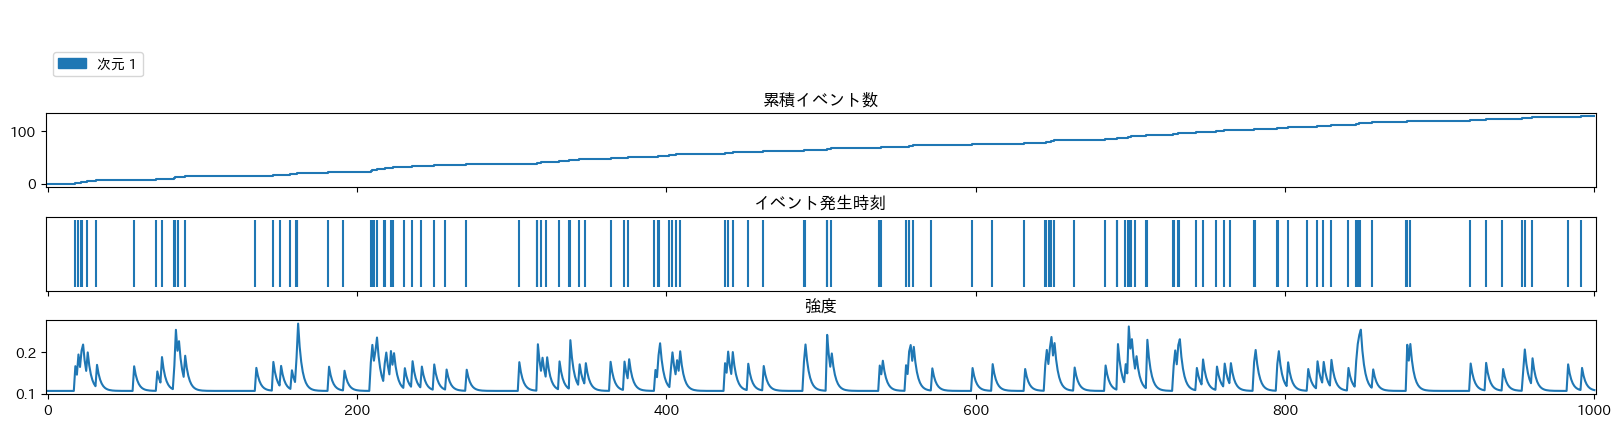

In [10]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
baselines, adjacencies, decays, end_time = 0.1, 0.2, 0.3, 1000
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. scipyのミニマイザーを使用する場合
scipy_method = 'scipy'
scipy_option = {
    'init_params': {'baselines': 0.1, 'adjacencies': 0.1, 'decays': 0.1}, # 探索開始する初期値
    'bounds': {'baselines': (1e-5, None), 'adjacencies': (1e-5, None), 'decays': (1e-5, None)}, # 探索するパラメータの範囲
}

# 2. 勾配法を使用する場合
gradient_method = 'gradient'
gradient_option = {
    'init_params': {'baselines': 1, 'adjacencies': 1, 'decays': 1}, # 探索開始する初期値
    'max_iter': 100000, # 最大イテレーション数
    'learning_rate': 0.0001, # 学習率
    'tol': 0.01, # 勾配のノルムがこの値以下になったら探索を終了する
}

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': {'baselines': slice(1e-5, 3, 0.1), 'adjacencies': slice(1e-5, 3, 0.1), 'decays': slice(1e-5, 3, 0.1)}, # 探索するグリッド
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': {'baselines': (1e-5, None), 'adjacencies': (1e-5, None), 'decays': (1e-5, None)}, # 探索するパラメータの範囲
}

# ------------------------------------------------------------👆
# ミニマイザーの設定値をセット (本例はscipyのミニマイザーを使用)
exp_estimator.set_minimization_config(method=scipy_method, option=scipy_option)

# 推定
estimation_with_scipy = exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
estimation_with_scipy.info()
estimation_with_scipy.plot()

### 3.2. 指数カネール: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

- kernel_type: exp
- params: {'baselines': array([0.01843863, 0.11096161]), 'adjacencies': array([[0.15785564, 0.75158675],
       [0.23023544, 0.21006614]]), 'decays': array([[0.22332842, 0.05908621],
       [0.24607729, 0.19257666]])}
- end_time: 1000
- loglik: -977.035144036667
- events:
  - dim_1: [ 13.61  18.09  33.03  39.26  46.51  48.81  53.02  59.56  62.16  67.15
  81.67  88.74  97.3  103.73 109.57 110.79 111.05 113.87 118.28 119.52
 119.72 122.19 122.31 122.71 124.22 124.92 125.18 127.32 127.64 129.6
 129.83 133.52 135.59 136.33 137.5  139.1  139.91 142.7  165.81 170.4
 173.3  173.79 174.43 180.13 180.54 184.44 191.86 197.15 197.71 203.47
 203.53 222.2  222.59 233.09 233.97 234.28 238.17 245.24 246.73 248.54
 250.87 257.2  298.4  299.07 337.22 355.62 363.46 364.39 379.5  386.97
 408.79 413.58 415.86 434.3  435.01 436.01 446.41 448.1  452.96 459.03
 467.83 473.87 478.48 482.82 485.58 494.89 506.65 507.06 507.71 507.72
 512.31 521.6  526.78 528.13 530.99 532.71 534.87 542.7  559

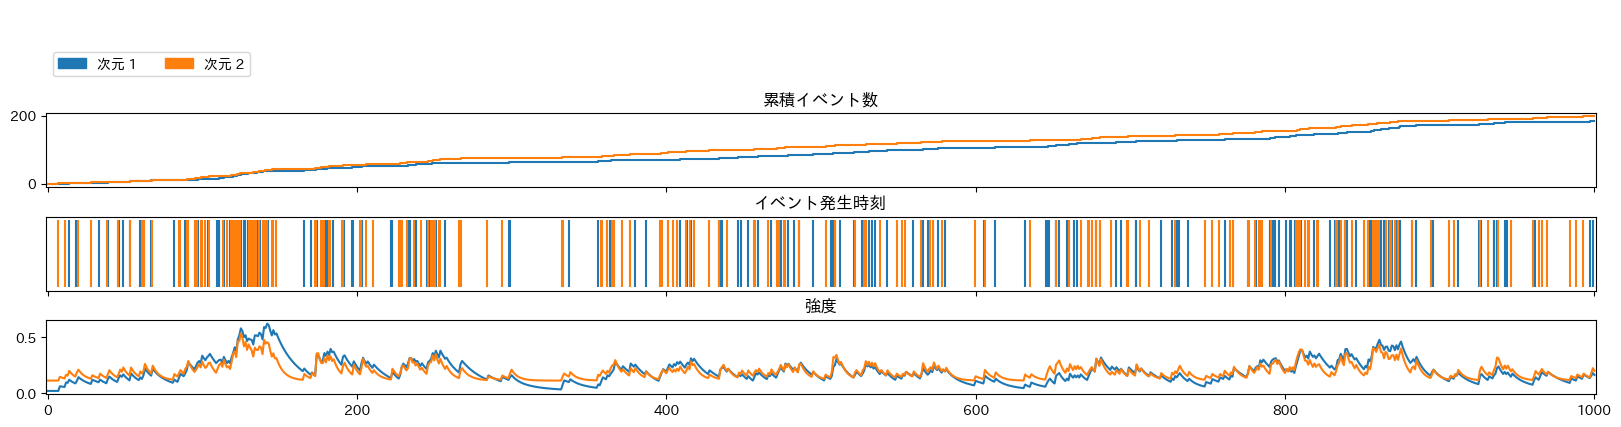

In [11]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
baselines, adjacencies, decays, end_time = [0.1, 0.1], [[0.2, 0.2], [0.2, 0.2]], [[0.3, 0.3], [0.3, 0.3]], 1000
exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
multi_exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. scipyのミニマイザーを使用する場合
scipy_method = 'scipy'
scipy_option = {
    'init_params': { # ❗探索開始する初期値
        'baselines': [1, 1],
        'adjacencies': [[1, 1],
                        [1, 1]],
        'decays': [[1, 1],
                   [1, 1]]
    },
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[(1e-5, None), (1e-5, None)],
                        [(1e-5, None), (1e-5, None)]],
        'decays': [[(1e-5, None), (1e-5, None)],
                   [(1e-5, None), (1e-5, None)]]
    },
}

# ❗2. 勾配法は多次元に対応していない

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': { # ❗探索するグリッド
        'baselines': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
        'adjacencies': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                        [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
        'decays': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                   [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    }
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[(1e-5, None), (1e-5, None)],
                        [(1e-5, None), (1e-5, None)]],
        'decays': [[(1e-5, None), (1e-5, None)],
                   [(1e-5, None), (1e-5, None)]]
    },
}
# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット (本例はscipyのミニマイザーを使用)
multi_exp_estimator.set_minimization_config(method=scipy_method, option=scipy_option)

# 推定
multi_estimation_with_scipy = multi_exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
multi_estimation_with_scipy.info()
multi_estimation_with_scipy.plot()

### 3.3. べき分布カネール: 1次元・多次元

- 推定器の生成
- パラメータに関連する部分(init_params, bounds, grid)

以外は指数カーネルの場合(3.1, 3.2)と同様

##### 推定器の生成

In [2]:
pow_law_estimator = Model.build_estimator('pow_law')

##### ミニマイザーの設定値 （パラメーターに関連する部分）

In [12]:
# 1次元

# init_params: 探索開始する初期値
{'baselines': 1, 'multipliers': 1, 'exponents': 2, 'cutoffs': 2}
# bounds: 探索するパラメータの範囲
{'baselines': (1e-5, None), 'multipliers': (1e-5, None), 'exponents': (1+1e-5, None), 'cutoffs': (1+1e-5, None)}
# grid: 探索するグリッド
{'baselines': slice(1e-5, 3, 0.1), 'multipliers': slice(1e-5, 3, 0.1), 'exponents': slice(1+1e-5, 4, 0.1), 'cutoffs': slice(1+1e-5, 4, 0.1)}


# 多次元

# init_params: 探索開始する初期値
{
    'baselines': [1, 1],
    'multipliers': [[1, 1],
                    [1, 1]],
    'exponents': [[2, 2],
                  [2, 2]],
    'cutoffs': [[2, 2],
                [2, 2]]
}
# bounds: 探索するパラメータの範囲
{
    'baselines': [(1e-5, None), (1e-5, None)],
    'multipliers': [[(1e-5, None), (1e-5, None)],
                    [(1e-5, None), (1e-5, None)]],
    'exponents': [[(1+1e-5, None), (1+1e-5, None)],
                  [(1+1e-5, None), (1+1e-5, None)]],
    'cutoffs': [[(1+1e-5, None), (1+1e-5, None)],
                [(1+1e-5, None), (1+1e-5, None)]]
}
# grid: 探索するグリッド
{
    'baselines': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
    'multipliers': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
                    [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    'exponents': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
                  [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]],
    'cutoffs': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
                [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]]
}

{'baselines': [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
 'multipliers': [[slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
  [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)]],
 'exponents': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]],
 'cutoffs': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]]}

### 3.4. 指数和カーネル: １次元・多次元

- kernel_type: exp
- params: {'baselines': array([0.0536697 , 0.08234241]), 'adjacencies': array([[0.01873883, 0.60864905],
       [0.12198298, 0.32369595]]), 'decays': array([[5.77322964, 0.04907094],
       [1.2479162 , 0.05722862]])}
- end_time: 1000
- loglik: -833.6272448286797
- events:
  - dim_1: [  1.83   9.14  54.46  54.97  56.3   62.25  62.91  63.    65.25  71.08
  93.37 112.34 112.97 114.47 120.88 127.77 131.56 132.29 134.74 136.16
 138.52 142.79 147.95 148.79 151.23 151.85 153.65 153.98 155.37 171.98
 177.28 179.02 180.52 189.49 205.75 215.41 215.66 217.34 219.72 220.4
 220.79 229.42 237.66 239.09 248.17 255.5  255.84 261.9  263.58 265.96
 266.88 279.22 284.75 289.2  294.25 307.16 310.09 326.74 335.38 338.29
 345.77 355.36 355.39 370.39 373.77 373.92 374.05 376.07 382.83 392.83
 393.7  398.09 398.89 405.43 406.69 408.2  410.84 411.04 426.61 429.8
 433.72 464.06 506.31 511.94 524.46 526.67 532.29 533.23 543.25 558.45
 565.37 568.64 572.38 578.36 580.55 601.48 607.72 614.07 61

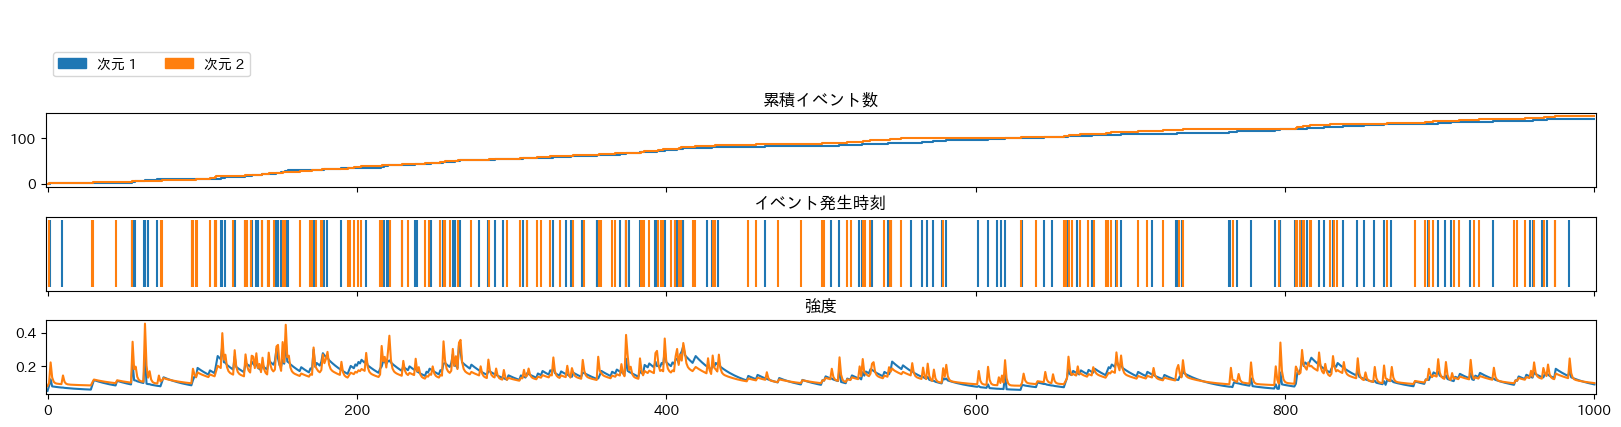

In [21]:
# -------テストデータ生成----------
sum_exp_simulator = Model.build_simulator('sum_exp')
end_time = 1000
baselines = [0.1, 0.1] # D次元ベクトル
adjacencies = [[[0.01, 0.01, 0.01], [0.02, 0.02, 0.02]],
               [[0.03, 0.03, 0.03], [0.04, 0.04, 0.04]]] # D×D×U行列
decays = [1, 1.5, 2], # U次元ベクトル
sum_exp_simulator.set_params(baselines=baselines, adjacencies=adjacencies, decays=decays)
test_data = sum_exp_simulator(end_time=end_time)
# ------------------------------

# 推定器の生成
sum_exp_estimator = Model.build_estimator('sum_exp')

# 指数関数の数(ハイパーパラメータ)を指定
sum_exp_estimator.set_num_exps(3)

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. scipyのミニマイザーのみ対応
scipy_method = 'scipy'
scipy_option = {
    'init_params': { # ❗探索開始する初期値
        'baselines': [1, 1],
        'adjacencies': [[[1, 1, 1], [1, 1, 1]],
                        [[1, 1, 1], [1, 1, 1]]],
        'decays': [1, 1, 1]
    },
    'bounds': { # ❗探索するパラメータの範囲
        'baselines': [(1e-5, None), (1e-5, None)],
        'adjacencies': [[[(1e-5, None), (1e-5, None), (1e-5, None)], [(1e-5, None), (1e-5, None), (1e-5, None)]],
                        [[(1e-5, None), (1e-5, None), (1e-5, None)], [(1e-5, None), (1e-5, None), (1e-5, None)]]],
        'decays': [(1e-5, None), (1e-5, None), (1e-5, None)]
    },
}
# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット (本例はscipyのミニマイザーを使用)
sum_exp_estimator.set_minimization_config(method=scipy_method, option=scipy_option)

# 推定
sum_exp_estimation = multi_exp_estimator(events=test_data.events, end_time=test_data.end_time)

# 結果
sum_exp_estimation.info()
sum_exp_estimation.plot()

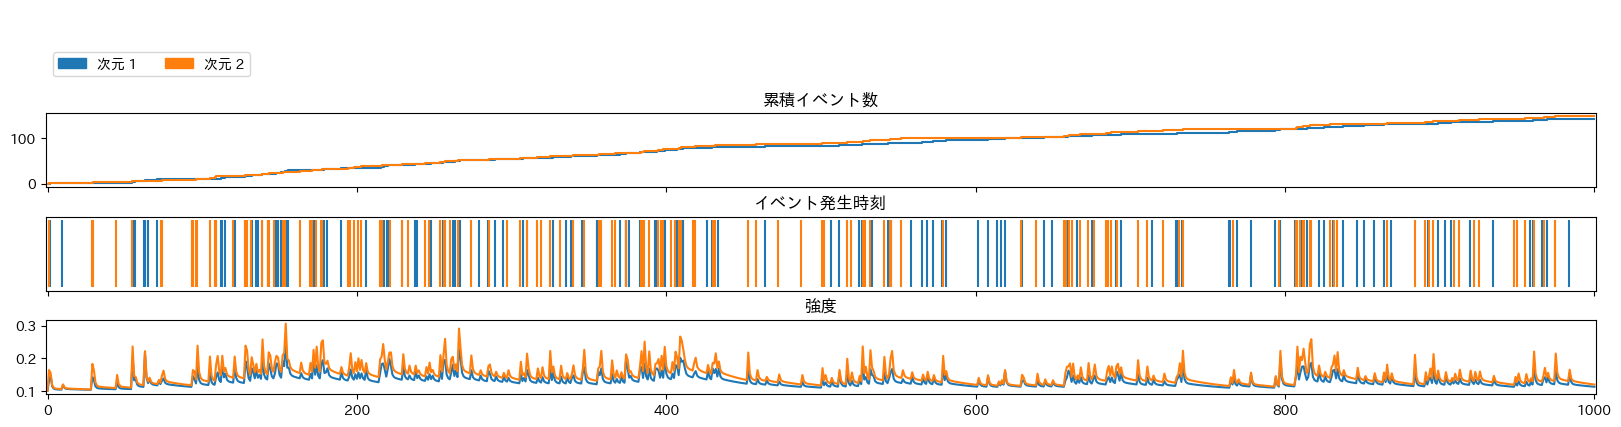

In [22]:
test_data.plot()